# Reading and exploring tabular data with Pandas

Pandas provides a DataFrame type that represents tabular data, much in the style of a spreadsheet.

There are a number of read functions in Pandas that return a DataFrame. Examples are <code>read_csv</code> or <code>read_table</code>.

## Getting some tabular data

Let's take as an example the churn dataset in https://github.com/EricChiang/churn

In [1]:
from urllib import urlretrieve
link = 'https://raw.githubusercontent.com/EricChiang/churn/master/data/churn.csv'
urlretrieve(link, "churn.txt")

('churn.txt', <httplib.HTTPMessage instance at 0x103bbae60>)

This has downloaded a file in ** comma-separated-values format (CSV)**.

"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service. It's a critical indicator in many businesses, as it's often the case that **acquiring new customers is a lot more expensive than retaining existing ones**. Typically, churn datasets contain one line per customer and a lot of variables, that are hypothesized to be potential causes of the final churn event.

In [2]:
!head -n5 churn.txt

The data above is of various types, integers, floats, and strings. But all of them are represented as text separated by commas. Note also that there is a period after each line. This is a typical way of sharing datasets, which is **multi-platform**, i.e. you can read these files in every operating system and with virtually every programming language. It is also readable with a normal text editor, and all of this makes the format very popular.

## Reading the data

This is as simple as using <code>pd.read_csv</code>

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("churn.txt")
df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


This call to <code>read_csv</code> used a lot of default values, e.g. it assumed a header line was present, etc. There are many modifiers in the function that allow you to deal with CSV files that have particularities.

In [4]:
# To see all the modifiers:
pd.read_csv?

For example, we can read only a few rows and only some columns.

In [5]:
df = pd.read_csv("churn.txt", nrows=3, usecols=["VMail Plan", "Day Charge", "CustServ Calls","Churn?"])
df

,VMail Plan,Day Charge,CustServ Calls,Churn?
0,yes,45.07,1,False.
1,yes,27.47,1,False.
2,no,41.38,0,False.


## Type inference

Pandas infers the type of the data.

In [6]:
print df["Day Charge"].dtype
print df["VMail Plan"].dtype
print df["CustServ Calls"].dtype
print df["Churn?"].dtype
print type(df["Churn?"])

float64
object
int64
object
<class 'pandas.core.series.Series'>


What about the types "object"? are there correctly inferred?

## Writing tabular data

The to_csv operation can be used to save CSV data.

In [7]:
df.to_csv("churn2.txt", index=False) # do not output a column for the index

## Changing columns

Sometimes we want to convert to a different type part of the data. This may be for example our case with some of the string columns in our churn dataset. We can achieve that in several ways, but maybe using <code>Series.map</code> is the easiest.

In [8]:
# Let's read all the dataset now for the three columns:
df = pd.read_csv("churn.txt", usecols=["VMail Plan", "Day Charge", "CustServ Calls","Churn?"])
# and then convert Churn and plan to boolean:
def change1(value):
    return value == "True."
def change2(value):
    return value == "yes"


df["Churn?"] = df["Churn?"].map(change1)
df["VMail Plan"] = df["VMail Plan"].map(change2)

print df["Churn?"].dtype
print df["VMail Plan"].head(3)

bool
0     True
1     True
2    False
Name: VMail Plan, dtype: bool


## Looking at the data

What about the distributions of the columns selected?

/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(array([  3.,   0.,   2.,   1.,   0.,   3.,   0.,   2.,   2.,   1.,   3.,
          4.,   2.,   5.,   8.,   7.,  10.,  14.,   5.,   9.,  13.,   8.,
         11.,  21.,  19.,  21.,  24.,  31.,  20.,  33.,  29.,  45.,  45.,
         44.,  34.,  58.,  53.,  52.,  57.,  62.,  77.,  81.,  74.,  81.,
         89.,  87.,  66.,  84.,  82.,  77.,  92.,  78.,  80.,  65.,  95.,
         86.,  91.,  70.,  80.,  75.,  68.,  83.,  69.,  69.,  59.,  49.,
         46.,  54.,  49.,  48.,  31.,  32.,  29.,  23.,  31.,  28.,  23.,
         30.,  19.,  18.,  14.,  14.,  12.,   7.,  10.,   8.,   6.,   4.,
          4.,   5.,   1.,   7.,   1.,   3.,   2.,   2.,   1.,   0.,   2.,
          1.]),
 array([  0.    ,   0.5964,   1.1928,   1.7892,   2.3856,   2.982 ,
          3.5784,   4.1748,   4.7712,   5.3676,   5.964 ,   6.5604,
          7.1568,   7.7532,   8.3496,   8.946 ,   9.5424,  10.1388,
         10.7352,  11.3316,  11.928 ,  12.5244,  13.1208,  13.7172,
         14.3136,  14.91  ,  15.5064,  16.1028

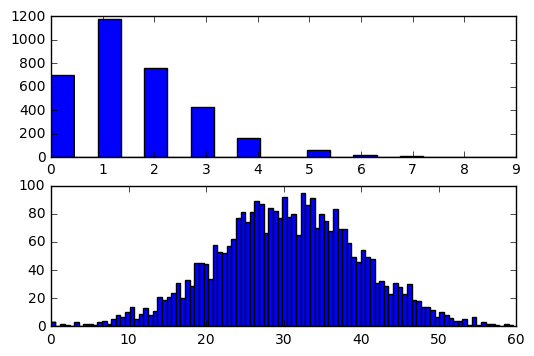

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.subplot(211)
plt.hist(df["CustServ Calls"], bins=20)
plt.subplot(212)
plt.hist(df["Day Charge"], bins=100)

The second appears to be normal? We can check it with <a href="http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.mstats.normaltest.html">scipy.stats.mstats.normaltest</a>¶

In [10]:
from scipy.stats.mstats import normaltest
_, pval1 = normaltest(df["CustServ Calls"])
_, pval2 = normaltest(df["Day Charge"])

print pval1, pval2

1.40445468611e-127 0.775220340033


Given the null hypothesis that the sample came from a normal distribution, if the p-value is very small, it means it is unlikely that the data came from a normal distribution.

## Following intuitions

In [21]:
# is the dataset balanced?
those_who_churned = df[df["Churn?"]]
those_who_not_churned = df[np.logical_not(df["Churn?"].values)] # Vector version of not
print len(those_who_churned), len(those_who_not_churned)

# are there differences in the classes for different values?
by_churn = df.groupby(["Churn?"])
by_churn.head(4)

483 2850


,VMail Plan,Day Charge,CustServ Calls,Churn?
0,True,45.07,1,False
1,True,27.47,1,False
2,False,41.38,0,False
3,False,50.90,2,False
10,False,21.95,4,True
15,False,56.59,4,True
21,False,10.61,5,True
33,False,42.43,1,True


In [22]:
print by_churn["CustServ Calls"].mean()
print by_churn["Day Charge"].mean()

Churn?
False    1.449825
True     2.229814
Name: CustServ Calls, dtype: float64
Churn?
False    29.780421
True     35.175921
Name: Day Charge, dtype: float64


It seems there are differences? But maybe not significant enough?

## Now some predictive model

Now a very naïve predictive model on our dataset...

In [13]:
from sklearn import svm
clf = svm.SVC()
clf.fit(df[["VMail Plan", "Day Charge", "CustServ Calls"]], df["Churn?"]) 
print clf.predict([True, 50, 0])
print clf.predict([False, 54, 4])

[False]
[ True]


/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/msicilia/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


The support vectors in SVC are the data points that are either misclassified, or close to the boundary. Let's see how many support vectors we do have...

In [14]:
print len(df["Churn?"])
print len(clf.support_vectors_)
print clf.classes_

3333
1343
[False  True]


A confusion matrix shows the following information:
<img src="http://3.bp.blogspot.com/_txFWHHNYMJQ/THyADzbutYI/AAAAAAAAAf8/TAXL7lySrko/s1600/Picture+8.png" width="30%">    

[[2795   55]
 [ 261  222]]


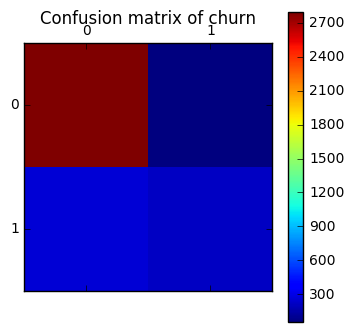

In [15]:
from sklearn.metrics import confusion_matrix
churn_pred = clf.predict(df[["VMail Plan", "Day Charge", "CustServ Calls"]])
# Compute confusion matrix
cm = confusion_matrix(df["Churn?"], churn_pred)
print cm

plt.matshow(cm)
plt.title('Confusion matrix of churn')
plt.colorbar()


## Is that a good model?

The dataset itself is disbalanced in the two classes.

In [16]:
number_of_churned = len(df[df["Churn?"]])
dataset_size = len(df["Churn?"])
churned_percent = float(number_of_churned) / dataset_size
print number_of_churned, dataset_size, churned_percent, 1-churned_percent

483 3333 0.144914491449 0.855085508551


So in principle, a dumb model giving a random "False" (not churned) has 85% of possibilities to give the correct answer over the original dataset.

In [17]:
# Number of positive (not churned) correctly predicted.
print cm[0, 0]
# Percentage:
print float(cm[0,0]) / dataset_size


2795
0.838583858386


If we look at the second row of the CM, this is the split of the correct and incorrect predictions of those who churned, and we can see the correct are less than 50%...